In [1]:
import django
import sys, os
import json
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from twitter.models import *

from django.db.models import Count
from django.db.models.fields import DateField
from django.db.models.functions import Cast


In [9]:
u = User.objects.get(screen_name="EskenSaskia")

retweets = Status.objects.filter(retweeted_by=u)
tweets = Status.objects.filter(author=u)

print(f"retweets: {retweets.count()}")
print(f"tweets: {tweets.count()}")

retweets: 487
tweets: 17556


In [3]:
with open("tweet_ids_eskensaskia.json") as f:
    marc_tweets = set([int(x.split()[1]) for x in f.readlines()])
    
print(f"from Marc: {len(marc_tweets)}")


from Marc: 16587


In [4]:
twint_ids = set(tweets.values_list('id',flat=True))

both = marc_tweets & twint_ids
only_twint = twint_ids - marc_tweets
only_marc = marc_tweets - twint_ids

print(f"{len(both)} from both scrapers")
print(f"{len(only_twint)} unique to twint")
print(f"{len(only_marc)} unique to Marc")



16584 from both scrapers
972 unique to twint
3 unique to Marc


In [5]:
twint_unique = Status.objects.filter(id__in=only_twint)

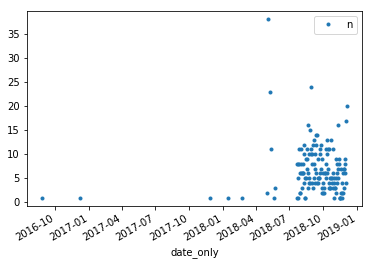

In [6]:
byday = twint_unique.annotate(
    date_only=Cast('created_at', DateField())
).values('date_only').annotate(
    n = Count('pk')
).order_by('date_only')

twint_df = pd.DataFrame.from_dict(list(byday))

twint_df['date_only'] = pd.to_datetime(twint_df['date_only'])

twint_df.plot('date_only','n', style=".")

In [7]:
byday = Status.objects.filter(
    id__in=both
).annotate(
    date_only=Cast('created_at', DateField())
).values('date_only').annotate(
    n = Count('pk')
).order_by('date_only')

both_df = pd.DataFrame.from_dict(list(byday))


both_df['date_only'] = pd.to_datetime(both_df['date_only'])

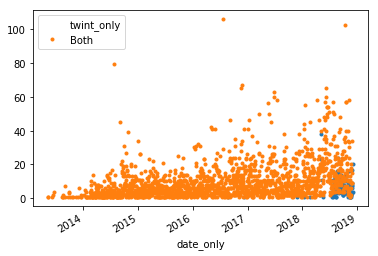

In [8]:
fig, ax = plt.subplots()

twint_df.plot('date_only','n', style=".",ax=ax,label="twint_only")
both_df.plot('date_only','n', style=".",ax=ax,label="Both")
